<a href="https://colab.research.google.com/github/s4kh4rov/BMIL/blob/master/magdiplom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import imutils

In [4]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="KlfuZxqMCfq22KG6TKdR")
project = rf.workspace("research-xvh79").project("window-detection-vnpow")
dataset = project.version(1).download("coco")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Window-detection-1 in coco:: 100%|██████████| 4848/4848 [00:01<00:00, 3419.47it/s]


In [ ]:
import shutil

for file1 in os.listdir('/content/Window-detection-1/train'):
  if(file1.endswith('.json')):
    save_path = '/content/drive/MyDrive/diplom/'
    shutil.move(os.path.join('/content/Window-detection-1/train',file1), save_path)

In [6]:
def getImageNameByImageId (images, id):
  for el in images:
    if(el['id']==id):
      return el['file_name']

In [11]:
def resizeImage(width, height, image):
  down_points = (width, height)
  return cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)

In [178]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="KlfuZxqMCfq22KG6TKdR")
# project = rf.workspace("shixi-rqywi").project("stairsdetect-for-blinders")
# dataset = project.version(7).download("coco")

all_img_paths = glob.glob("/content/STAIRSdetect-FOR-blinders-7/valid/*")
path = '/content/drive/MyDrive/diplom/test/validStairs/'
i=0
for img_path in all_img_paths:
  if(img_path.endswith(".jpg")):
    img = cv2.imread(img_path)
    # img300 = resizeImage(300,300,img)
    # imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=100, sigma_r=0.3)
    # imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
    # imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=5)
    cv2.imwrite(os.path.join(path , 'stair'+str(i)+'.jpg'), img)
    i+=1
print(i)


248


In [81]:
# двери
# from roboflow import Roboflow
# rf = Roboflow(api_key="KlfuZxqMCfq22KG6TKdR")
# project = rf.workspace("miguel-ortiz").project("door_cls")
# dataset = project.version(3).download("folder")

# all_img_paths = glob.glob("/content/door_cls-3/test/door_cls/*")
# path = '/content/drive/MyDrive/diplom/colorImages/door/'
# i=0
# for img_path in all_img_paths:
#   img = cv2.imread(img_path)
#   img300 = resizeImage(300,300,img)
#   imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=100, sigma_r=0.3)
#   imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
#   imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=5)
#   cv2.imwrite(os.path.join(path , 'door'+str(i)+'.jpg'), imgLap)
#   i+=1
# print(i)

678


In [ ]:
# окна
# import json
# f = open('/content/drive/MyDrive/diplom/_annotations.coco.json')
# data = json.load(f)
# path = '/content/drive/MyDrive/diplom/rfProcessedImages/window/'
# img_path = "/content/Window-detection-1/train/"
# i=0
# for annotation in data['annotations']:
#   image_id = annotation['image_id']
#   bbox = annotation['bbox']
#   x1=int(bbox[0])
#   y1=int(bbox[1])
#   w=int(bbox[2])
#   h=int(bbox[3])
#   filename = getImageNameByImageId(data['images'],image_id)
#   img = cv2.imread(img_path+filename)

#   cropped_image = img[y1:y1+h, x1:x1+w]

#   border_size = 20
#   border = cv2.copyMakeBorder(
#       cropped_image,
#       top=border_size,
#       bottom=border_size,
#       left=border_size,
#       right=border_size,
#       borderType=cv2.BORDER_CONSTANT,
#       value=[128,128,128]
#   )

#   img300 = resizeImage(300,300,border)
#   imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=100, sigma_r=0.3)
#   imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
#   imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=5)
#   cv2.imwrite(os.path.join(path , 'window'+str(i)+'.jpg'), imgLap)
#   i+=1
#   print(i)


import json
f = open('/content/drive/MyDrive/diplom/_annotations.coco.json')
data = json.load(f)
path = '/content/drive/MyDrive/diplom/colorImages/window/'
img_path = "/content/Window-detection-1/train/"
i=0
for i in range(1000):
  annotation = data['annotations'][i]
  image_id = annotation['image_id']
  filename = getImageNameByImageId(data['images'],image_id)
  img = cv2.imread(img_path+filename)
  cv2.imwrite(os.path.join(path , 'window'+str(i)+'.jpg'), img)
  i+=1
  print(i)

In [ ]:
def resizeImage(width, height, image):
  down_points = (width, height)
  return cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)

In [ ]:
img_path = 'https://drive.google.com/drive/folders/1EX_p0ncVGXKN3piWRa7h463ii8IAfFMy'
path = '/content/drive/MyDrive/diplom/test/'
img = cv2.imread(img_path)
img300 = resizeImage(300,300,img)
cv2_imshow(img300)
image = cv2.flip(img300,1)
cv2_imshow(image)
# imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=10, sigma_r=0.9)
imgEdge= img300
imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
cv2_imshow(imgEdge)
imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=5)
cv2_imshow(imgLap)
# img64 = resizeImage(64,64,imgLap)
# cv2_imshow(img64)
# cv2_imshow(cv2.flip(img64,1))


# img64 = resizeImage(64,64,imgLap)
# cv2_imshow(img64)


resized = imutils.resize(imgLap, width=64,height=64)
cv2_imshow(resized)
cv2.imwrite(os.path.join(path , 'doorFinal.png'), resized)

In [ ]:
all_img_paths = glob.glob("/content/drive/MyDrive/diplom/photos/angles/*")
path = '/content/drive/MyDrive/diplom/readyImg/angle/'
i=0
print(len(all_img_paths))
for img_path in all_img_paths:
  img = cv2.imread(img_path)
  img300 = resizeImage(300,300,img)
  imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=10, sigma_r=0.9)
  imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
  imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=5)
  # img64 = imutils.resize(imgLap, width=64,height=64)
  # cv2_imshow(img64)
  cv2.imwrite(os.path.join(path , 'angle'+str(i)+'.jpg'), imgLap)
  i+=1
  flip = cv2.flip(imgLap,1)
  cv2.imwrite(os.path.join(path , 'angle'+str(i)+'.jpg'), flip)
  i+=1

# img_path = '/content/drive/MyDrive/diplom/photos/doors/IMG_1840_126.jpg'

# img = cv2.imread(img_path)
# img300 = resizeImage(300,300,img)
# cv2_imshow(img300)
# image = cv2.flip(img300,1)
# cv2_imshow(image)
# imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=10, sigma_r=0.9)
# imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
# cv2_imshow(imgEdge)
# imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=5)
# cv2_imshow(imgLap)
# img64 = resizeImage(64,64,imgLap)
# cv2_imshow(img64)
# cv2_imshow(cv2.flip(img64,1))


# # img64 = resizeImage(64,64,imgLap)
# # cv2_imshow(img64)


# resized = imutils.resize(imgLap, width=64,height=64)
# cv2_imshow(resized)

333


In [134]:
# DATADIR = "/content/drive/MyDrive/diplom/colorImages/"

# LABELS = ["door", "window"]

# X_TRAIN = []
# Y_TRAIN = []

# IMG_SIZE = 64
# for category in LABELS:
#     path = os.path.join(DATADIR, category)
#     class_num = LABELS.index(category)
#     for img in os.listdir(path):
#         try:
#             img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
#             new_array = imutils.resize(img_array, IMG_SIZE,IMG_SIZE)
#             # new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#             X_TRAIN.append(new_array)
#             Y_TRAIN.append(class_num)
#         except Exception as e:
#             pass
# cv2_imshow(X_TRAIN[10])
# X_TRAIN = np.array(X_TRAIN).reshape(-1, IMG_SIZE, IMG_SIZE,1)
# Y_TRAIN = np.array(Y_TRAIN)
# cv2_imshow(X_TRAIN[10])
# X_TRAIN = X_TRAIN/255

IMG_SIZE = 64
DATADIR = "/content/drive/MyDrive/diplom/colorImages/"

train_ds = tf.keras.utils.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMG_SIZE, IMG_SIZE),
  batch_size=5)

Found 3868 files belonging to 3 classes.
Using 3095 files for training.


In [135]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_SIZE, IMG_SIZE),
  batch_size=5)

Found 3868 files belonging to 3 classes.
Using 773 files for validation.


In [143]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
class_names = train_ds.class_names
print(class_names)
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(IMG_SIZE,
                                  IMG_SIZE,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

num_classes = len(class_names)

# model = models.Sequential()
# model.add(data_augmentation),
# model.add(layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3))),
# model.add(layers.Conv2D(16, 3, padding='same', activation='relu')),
# model.add(layers.MaxPooling2D()),
# model.add(layers.Conv2D(32, 3, padding='same', activation='relu')),
# model.add(layers.MaxPooling2D()),
# model.add(layers.Conv2D(64, 3, padding='same', activation='relu')),
# model.add(layers.MaxPooling2D()),
# model.add(layers.Dropout(0.2)),
# model.add(layers.Flatten()),
# model.add(layers.Dense(128, activation='relu')),
# model.add(layers.Dense(num_classes))

model = models.Sequential()
model.add(data_augmentation),
model.add(layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3))),
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes))
model.add(layers.Activation("softmax"))

['door', 'stair', 'window']


In [144]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [176]:
epochs=2
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/2
619/619 [==============================] - 42s 67ms/step - loss: 0.1122 - accuracy: 0.9628 - val_loss: 0.3018 - val_accuracy: 0.9107
Epoch 2/2
619/619 [==============================] - 44s 71ms/step - loss: 0.1205 - accuracy: 0.9551 - val_loss: 0.2209 - val_accuracy: 0.9418


In [175]:
model.save('/content/drive/MyDrive/diplom/model10.keras')

In [182]:
tf.keras.models.load_model('/content/drive/MyDrive/diplom/model9.keras')
TESTDIR = "/content/drive/MyDrive/diplom/test/s1.jpg"
validDir = glob.glob("/content/drive/MyDrive/diplom/test/validStairs/*")
for img_path in validDir:
  img = tf.keras.utils.load_img(
      img_path, target_size=(IMG_SIZE, IMG_SIZE)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )

1/1 [==============================] - 0s 26ms/step
This image most likely belongs to stair with a 57.61 percent confidence.
1/1 [==============================] - 0s 27ms/step
This image most likely belongs to stair with a 55.55 percent confidence.
1/1 [==============================] - 0s 46ms/step
This image most likely belongs to stair with a 57.61 percent confidence.
1/1 [==============================] - 0s 23ms/step
This image most likely belongs to stair with a 57.61 percent confidence.
1/1 [==============================] - 0s 21ms/step
This image most likely belongs to stair with a 56.86 percent confidence.
1/1 [==============================] - 0s 22ms/step
This image most likely belongs to stair with a 57.61 percent confidence.
1/1 [==============================] - 0s 30ms/step
This image most likely belongs to stair with a 57.57 percent confidence.
1/1 [==============================] - 0s 24ms/step
This image most likely belongs to stair with a 57.55 percent confidence.


In [70]:
print(len(X_TRAIN))
print(len(Y_TRAIN))
#print(X_TRAIN)

11979
11979


In [130]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))
model.add(layers.Activation("softmax"))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 flatten_9 (Flatten)         (None, 9216)            

In [71]:
model = models.Sequential()
# model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(64, 64,3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(64, 64,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(32, 32,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(64, (5, 5), activation='relu',padding='same' ,input_shape=(16, 16,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(2))
model.add(layers.Activation("softmax"))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 activation_2 (Activation)   (None, 16, 16, 32)       

In [72]:
model.fit(X_TRAIN, Y_TRAIN, batch_size=32, epochs=5)

Epoch 1/5
375/375 [==============================] - 116s 308ms/step - loss: 0.0959 - accuracy: 0.9666
Epoch 2/5
375/375 [==============================] - 113s 302ms/step - loss: 0.0201 - accuracy: 0.9947
Epoch 3/5
375/375 [==============================] - 114s 305ms/step - loss: 0.0061 - accuracy: 0.9984
Epoch 4/5
375/375 [==============================] - 115s 308ms/step - loss: 0.0044 - accuracy: 0.9988
Epoch 5/5
375/375 [==============================] - 114s 303ms/step - loss: 0.0052 - accuracy: 0.9987


1/1 [==============================] - 0s 30ms/step
[[1. 0.]
 [1. 0.]
 [0. 1.]]
0
door


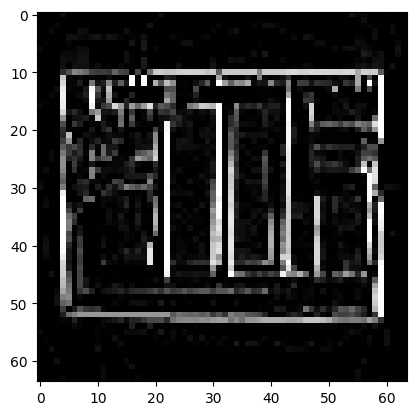

In [78]:
import matplotlib.pyplot as plt
TESTDIR = "/content/drive/MyDrive/diplom/test/window11111.jpg"
# for img in os.listdir(TESTDIR):
#     try:
#         img_array = cv2.imread(os.path.join(TESTDIR, img))
#         new_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#         new_shape = new_img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#         predictions = model.predict(new_shape)
#         # plt.imshow(new_img)
#         # print(predictions)
#         print(LABELS[np.argmax(predictions)])
#     except Exception as e:
#         pass
img_array = cv2.imread(TESTDIR)
new_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
new_shape = new_img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(new_shape)
plt.imshow(new_img)
print(predictions)
print(np.argmax(predictions))
print(LABELS[np.argmax(predictions)])